# Talk about Framing and outlining the problem (Business problem and specifics)
# Talk about data

# Will it be delayed?

Everyone who has flown has experienced a delayed or cancelled flight. Both airlines and airports would like to improve their on-time performance and predict when a flight will be delayed or cancelled several days in advance. You are being hired to build a model that can predict if a flight will be delayed. To learn more, you must schedule a meeting with your client (me). To schedule an appointment with your client, send an event request through Google Calendar for a 15 minute meeting. Both you and your project partner must attend the meeting. Come prepared with questions to ask your client. Remember that your client is not a data scientist and you will need to explain things in a way that is easy to understand. Make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

For this project you must go through most all steps in the checklist. You must write responses for all items as done in the homeworks, however sometimes the item will simply be "does not apply". Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Some changes to the checklist:

* Do not do the final part (launching the product).
* Your presentation will be done as information written in this document in a dedicated section (no slides or anything like that). It should include high-level summary of your results (including what you learned about the data, the "accuracy" of your model, what features were important, etc). It should be written for your client, not your professor or teammates. It should include the best summary plots/graphics/data points.
* The models and hyperparameters you should consider during short-listing and fine-tuning will be released at a later time (dependent on how far we get over the next two weeks).
* Data retrieval must be automatic as part of the code (so it can easily be re-run and grab the latest data). Do not commit any data to the repository.
* Your submission must include a pickled final model along with this notebook.


# Notes

* gov agency tasked with improving efficiency with comercial airtraffic from consumer standpoint, 
* predict delays and errors 7 days in advanced
* data is from the 80s, subitted take off, supposed to leave, etc, on BTS (get a link) only look at 2023 and 2024
* less predictions but more accurate predictions by a 1/4
* National Air System (group that runs opperations at a single airport, makes all decisions so something they do can cause a run down, weather issues, security (TSA, bad person on deck), late arrival, cancelations,  ) broken down into minor, medium, major categories
* Things to ignore in data, diverted, international destination or arrival (only USA to USA)

In [ ]:
!pip install numpy scipy pandas matplotlib scikit-learn seaborn

In [2]:
# All of your imports here (you may need to add some)
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import glob
import os


In [2]:
def read_csv(file_path):
    """Reads a CSV file and returns its content as a Pandas DataFrame."""
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return None


In [3]:
#displaying the aircrafts
aircraft_data = pd.read_csv('aircrafts.csv')
aircraft_data.head()

,id,reg,active,serial,hexIcao,airlineName,iataCodeShort,icaoCode,model,modelCode,...,registrationDate,typeName,numEngines,engineType,isFreighter,productionLine,ageYears,verified,numRegistrations,firstRegistrationDate
0,9724,N840MH,True,29718.0,AB80F4,Delta Air Lines,764,B764,B764,B767-432ER,...,2001-05-23,Boeing 767-400,2.0,Jet,False,Boeing 767,24.0,True,1,2001-05-23
1,11301,N857DZ,True,31968.0,ABC1BC,Delta Air Lines,737,NaN,B739,B737-932ER,...,2016-04-07,Boeing 737,2.0,Jet,False,Boeing 737,9.0,True,1,2016-04-07
2,2118392,N432QX,False,4166.0,A52C00,Horizon Air,DH4,DH8D,DHC8,DHC-8 402,...,2007-07-31,De Havilland Canada DHC-8-400 Dash 8Q,2.0,Turboprop,False,Bombardier DHC-8,17.6,True,1,2007-07-31
3,5408,N591JB,True,2246.0,A7A1E8,JetBlue Airways,320,A320,A320,320-232,...,2004-08-04,Airbus A320,2.0,Jet,False,Airbus A320,20.7,True,1,2004-08-04
4,10821,N317AS,True,30856.0,A360E3,Alaska Airlines,739,B739,B739,B737-990,...,2003-03-26,Boeing 737-900,2.0,Jet,False,Boeing 737 NG,22.0,True,1,2003-03-26


# Frame problem, get data, explore

# Combing all the files into one for each year


In [4]:
if os.path.exists('2023_combined_data.parquet'):
    print("The file '2023_combined_data.parquet' already exists. Skipping file creation.")
else:
    #Read in all the CSV files in the 2023_Data folder
    file_paths = glob.glob('2023_Data/*.csv')

    # Combine all the data into a single DataFrame
    data_frames = [pd.read_csv(file_path) for file_path in file_paths]
    combined_df = pd.concat(data_frames, ignore_index=True)

    #saving the combined data to a parquet file
    combined_df.to_parquet('2023_combined_data.parquet')


The file '2023_combined_data.parquet' already exists. Skipping file creation.


In [5]:
if os.path.exists('2024_combined_data.parquet'):
    print("The file '2024_combined_data.parquet' already exists. Skipping file creation.")
else:
    #Read in all the CSV files in the 2023_Data folder
    file_paths = glob.glob('2024_Data/*.csv')

    # Combine all the data into a single DataFrame
    data_frames = [pd.read_csv(file_path) for file_path in file_paths]
    combined_df = pd.concat(data_frames, ignore_index=True)

    #saving the combined data to a parquet file
    combined_df.to_parquet('2024_combined_data.parquet')

The file '2024_combined_data.parquet' already exists. Skipping file creation.


In [6]:
if os.path.exists('combined_data.parquet'):
    print("The file 'combined_data.parquet' already exists.")
else:
    data_2023 = pd.read_parquet('2023_combined_data.parquet')
    data_2024 = pd.read_parquet('2024_combined_data.parquet')
    combined_data = pd.concat([data_2023, data_2024], ignore_index=True)

In [7]:
if os.path.exists('combined_data.parquet'):
    print("The file 'combined_data.parquet' already exists. Skipping file creation.")
    combined_data = pd.read_parquet('combined_data.parquet')
else:
    # Read the parquet files
#Save the combined data to a new parquet file
    combined_data.to_parquet('combined_data.parquet')

In [8]:
# Shape and preview
print(combined_data.shape)
combined_data.head()

(14825707, 120)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2023,3,9,24,7,2023-09-24,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,3,9,24,7,2023-09-24,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,3,9,24,7,2023-09-24,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,3,9,24,7,2023-09-24,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,3,9,24,7,2023-09-24,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [9]:
#Check if the cleaned data file already exists
if os.path.exists('cleaned_data.parquet'):
    print("The file 'cleaned_data.parquet' already exists. Skipping data cleaning.")
    merged_data = pd.read_parquet('cleaned_data.parquet')
else:
    # Import the Parquet file
    
    print("File is imported.")

    # Define the columns to remove
    columns_to_remove = [
    'Diverted',  # First, drop the main DIVERTED column
    'DivAirportLandings', 'DivReachedDest', 'DivActualElapsedTime', 
    'DivArrDelay', 'DivDistance', 'Div1Airport', 'Div1WheelsOn', 'Div1TotalGTime', 
    'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum',
    'Div1AirportID', 'Div1AirportSeqID',
    'Div1TotalGTime', 'Div1LongestGTime', 'Div2Airport', 'Div2WheelsOn', 
    'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum','Div2AirportID', 'Div2AirportSeqID', 'Div2TotalGTime', 'Div2LongestGTime', 
    'Div3Airport', 'Div3WheelsOn', 'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 
    'Div3TailNum','Div3AirportID', 'Div3AirportSeqID', 'Div3TotalGTime', 'Div3LongestGTime', 
    'Div4Airport', 'Div4WheelsOn', 'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 
    'Div4TailNum', 'Div4AirportID', 'Div4AirportSeqID', 'Div4TotalGTime', 'Div4LongestGTime', 
    'Div5Airport', 'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 
    'Div5TailNum', 'Div5AirportID', 'Div5AirportSeqID', 'Div5TotalGTime', 'Div5LongestGTime',
    'DepTime', 'DepDelay', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'Marketing_Airline_Network',
    'Operated_or_Branded_Code_Share_Partners', 'Flight_Number_Marketing_Airline', 'Originally_Scheduled_Code_Share_Airline', 'DOT_ID_Originally_Scheduled_Code_Share_Airline', 
    'IATA_Code_Originally_Scheduled_Code_Share_Airline', 'Flight_Num_Originally_Scheduled_Code_Share_Airline', 'IATA_Code_Marketing_Airline', 'DOT_ID_Operating_Airline',
    'DOT_ID_Marketing_Airline', 'IATA_Code_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 
    'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
    'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTimeBlk',  'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrDelayMinutes',
    'ArrivalDelayGroups', 'ArrTimeBlk', 'Flights', 'AirTime', 'ActualElapsedTime', 'CRSElapsedTime',  'DistanceGroup', 'FirstDepTime',
    'TotalAddGTime', 'LongestAddGTime', 'Unnamed: 119', 'Duplicate', 'Flight_Number_Operating_Airline'
    
    ]
    
    print("Columns will be dropped.")

    # Drop the specified columns
    merged_data = combined_data.drop(columns=columns_to_remove)

    # Save the cleaned DataFrame to a new Parquet file
    merged_data.to_parquet('cleaned_data.parquet')

    print("Cleaned data saved successfully.")

    # Output the shape and data types of the cleaned DataFrame
    # print(f"Cleaned data shape: {merged_data.shape}")
    # print(f"Cleaned data types:\n{merged_data.dtypes}")


File is imported.
Columns will be dropped.
Cleaned data saved successfully.


In [10]:
#Output the shape and data types of the cleaned DataFrame
print(f"Cleaned data shape: {merged_data.shape}")
print(f"Cleaned data types:\n{merged_data.dtypes}")
merged_data.head()

Cleaned data shape: (14825707, 20)
Cleaned data types:
Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
FlightDate             object
Operating_Airline      object
Tail_Number            object
Origin                 object
Dest                   object
CRSDepTime              int64
DepDelayMinutes       float64
Cancelled             float64
CancellationCode       object
Distance              float64
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
dtype: object


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,Tail_Number,Origin,Dest,CRSDepTime,DepDelayMinutes,Cancelled,CancellationCode,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2023,3,9,24,7,2023-09-24,B6,N516JB,MCO,RIC,910,0.0,0.0,None,667.0,NaN,NaN,NaN,NaN,NaN
1,2023,3,9,24,7,2023-09-24,B6,N559JB,LGA,FLL,810,14.0,0.0,None,1076.0,NaN,NaN,NaN,NaN,NaN
2,2023,3,9,24,7,2023-09-24,B6,N634JB,FLL,LGA,947,67.0,0.0,None,1076.0,66.0,0.0,0.0,0.0,0.0
3,2023,3,9,24,7,2023-09-24,B6,N967JT,FLL,SFO,1840,0.0,0.0,None,2584.0,NaN,NaN,NaN,NaN,NaN
4,2023,3,9,24,7,2023-09-24,B6,N964JT,SFO,FLL,2035,15.0,0.0,None,2584.0,NaN,NaN,NaN,NaN,NaN


# Merging more Data

In [11]:
if os.path.exists('air-to-main.parquet'):
    print("The file 'air-to-main.parquet' already exists. Skipping data cleaning.")
    merged_data = pd.read_parquet('air-to-main.parquet')
else:
    air_main = pd.read_csv('aircrafts.csv')
    columns_to_remove = [
    'id', 'serial', 'hexIcao', 'airlineName', 'iataCodeShort', 'model', 'modelCode', 'numSeats', 'rolloutDate', 'firstFlightDate', 'deliveryDate',
    'registrationDate', 'isFreighter', 'productionLine', 'firstRegistrationDate'
]
# Drop the specified columns
    air_main = air_main.drop(columns=columns_to_remove)
    merged_data = merged_data.merge(air_main, left_on='Tail_Number', right_on='reg', how='left')
    merged_data.to_parquet('air-to-main.parquet')

In [12]:
print(merged_data.shape)
merged_data.head()

(14825707, 29)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,Tail_Number,Origin,Dest,...,LateAircraftDelay,reg,active,icaoCode,typeName,numEngines,engineType,ageYears,verified,numRegistrations
0,2023,3,9,24,7,2023-09-24,B6,N516JB,MCO,RIC,...,NaN,N516JB,True,A320,Airbus A320,2.0,Jet,24.6,True,1.0
1,2023,3,9,24,7,2023-09-24,B6,N559JB,LGA,FLL,...,NaN,N559JB,True,A320,Airbus A320,2.0,Jet,22.3,True,1.0
2,2023,3,9,24,7,2023-09-24,B6,N634JB,FLL,LGA,...,0.0,N634JB,True,A320,Airbus A320,2.0,Jet,19.1,True,1.0
3,2023,3,9,24,7,2023-09-24,B6,N967JT,FLL,SFO,...,NaN,N967JT,True,A321,Airbus A321,2.0,Jet,8.6,True,1.0
4,2023,3,9,24,7,2023-09-24,B6,N964JT,SFO,FLL,...,NaN,N964JT,True,A321,Airbus A321,2.0,Jet,9.0,True,1.0


In [13]:
# check if flightDateTime_data.parquet exists
if os.path.exists('flightDateTime_data.parquet'):
    print("The file 'flightDateTime_data.parquet' already exists. Skipping file creation.")
    merged_data = pd.read_parquet('flightDateTime_data.parquet')
else:
    #create two new columns to indicate if the day is a holiday or if the week is a holiday week
    import holidays
    from datetime import date

    us_holidays = holidays.US()

    merged_data["FlightDate"] = pd.to_datetime(merged_data["FlightDate"])
    merged_data["IsHoliday"] = merged_data["FlightDate"].apply(lambda x: int(x in us_holidays))
    merged_data["IsHolidayWeek"] = merged_data["FlightDate"].apply(lambda x: int(any ((x + pd.Timedelta(days=i)) in us_holidays for i in range(-3, 4))))
    merged_data.head()

In [14]:
# merged_data.to_parquet('flightDateTime_data.parquet')
if os.path.exists('flightDateTime_data.parquet'):
    print("The file 'flightDateTime_data.parquet' already exists.")
    merged_data = pd.read_parquet('flightDateTime_data.parquet')
else:
    merged_data.to_parquet('flightDateTime_data.parquet')

In [15]:
weather = pd.read_parquet('weather.parquet')
columns_to_remove = [
    'latitude', 'longitude', 'relative_humidity_2m', 'dew_point_2m', 'temperature_2m', 'soil_temperature_0cm', 'soil_moisture_0_to_1cm', 'vapour_pressure_deficit',
    'et0_fao_evapotranspiration', 'evapotranspiration', 'surface_pressure', 'weather_code', 'pressure_msl'
]
# Drop the specified columns
weather = weather.drop(columns=columns_to_remove)
weather.head()

,date,precipitation_probability,apparent_temperature,precipitation,rain,showers,snowfall,snow_depth,visibility,cloud_cover_mid,...,wind_speed_180m,wind_direction_10m,wind_direction_80m,wind_direction_120m,wind_direction_180m,wind_gusts_10m,temperature_80m,temperature_120m,temperature_180m,IATA
0,2022-12-31 19:00:00-05:00,NaN,19.110538,0.0,0.0,0.0,0.0,0.0,200.0,73.0,...,41.688557,222.61401,219.53612,232.43134,233.42688,23.759998,20.05,20.15,19.487,HHH
1,2022-12-31 20:00:00-05:00,NaN,20.203838,0.0,0.0,0.0,0.0,0.0,13000.0,2.0,...,42.548588,224.99990,224.45440,233.13002,237.78910,21.960000,19.70,19.80,19.387,HHH
2,2022-12-31 21:00:00-05:00,NaN,20.123550,0.0,0.0,0.0,0.0,0.0,13500.0,0.0,...,39.738846,241.18930,230.98060,237.46495,250.41591,22.680000,19.30,19.35,19.087,HHH
3,2022-12-31 22:00:00-05:00,NaN,18.380135,0.0,0.0,0.0,0.0,0.0,500.0,0.0,...,34.964508,246.03750,248.55220,244.57317,253.24417,19.080000,19.00,18.95,18.887,HHH
4,2022-12-31 23:00:00-05:00,NaN,17.604190,0.0,0.0,0.0,0.0,0.0,300.0,0.0,...,33.114130,228.57643,229.92717,244.61214,258.07928,22.319998,18.80,18.75,18.587,HHH


In [16]:
# First, let's drop the rows with null values in Origin or DepTime from flights
merged_data = merged_data.dropna(subset=['Origin', 'CRSDepTime'])

# Convert both category columns to the same dtype
merged_data["Origin"] = merged_data["Origin"].astype(str)
weather['IATA'] = weather['IATA'].astype(str)

# Create the datetime columns
mins = pd.to_timedelta(merged_data["CRSDepTime"] // 100 * 60 + merged_data["CRSDepTime"] % 100, unit='m')
merged_data["flightDateTime"] = pd.to_datetime(merged_data["FlightDate"]) + mins
weather["date"] = pd.to_datetime(weather["date"].apply(lambda x: x.replace(tzinfo=None)))

# Sort the DataFrames
merged_data.sort_values(by=["flightDateTime"], inplace=True)
weather.sort_values(by=["date"], inplace=True)

# Perform the merge
merged = pd.merge_asof(merged_data, weather,
                      left_by='Origin', left_on='flightDateTime',
                      right_by='IATA', right_on='date', direction='nearest')

# Drop the redundant columns
merged.drop(columns=['FlightDate', 'IATA', 'date'], inplace=True)

In [17]:
def merge_weather(merged, weather):
    # Make copies to avoid modifying the original dataframes

    # Convert both category columns to the same dtype
    merged["Dest"] = merged["Dest"].astype(str)
    weather['IATA'] = weather['IATA'].astype(str)
    
    # Prepare weather data (should already be datetime from previous code)
    weather["date"] = pd.to_datetime(weather["date"].apply(lambda x: x.replace(tzinfo=None)))
    
    # Sort the DataFrames (required for merge_asof)
    merged.sort_values(by=["flightDateTime"], inplace=True)
    weather.sort_values(by=["date"], inplace=True)
    
    # Rename weather columns to add _dest_dep_time suffix (except for merge columns)
    weather_renamed = weather.copy()
    for col in weather.columns:
        if col not in ['IATA', 'date']:
            weather_renamed.rename(columns={col: f"{col}_dest_dep_time"}, inplace=True)
    
    # Perform the merge
    result = pd.merge_asof(merged, weather_renamed,
                          left_by='Dest', left_on='flightDateTime',
                          right_by='IATA', right_on='date', direction='nearest')
    
    # Drop redundant columns
    if 'IATA' in result.columns:
        result.drop(columns=['IATA'], inplace=True)
    if 'date' in result.columns:
        result.drop(columns=['date'], inplace=True)
    
    return result

In [18]:
weather_merged_data = merge_weather(merged, weather)

In [3]:
# turn data into a parquet file
if (os.path.exists('data.parquet')):
    print("The file 'data.parquet' already exists. Skipping file creation")
    weather_merged_data = pd.read_parquet('data.parquet')
else:
    weather_merged_data.to_parquet('data.parquet')

The file 'data.parquet' already exists. Skipping file creation


In [20]:
weather_merged_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,Dest,CRSDepTime,...,wind_speed_120m_dest_dep_time,wind_speed_180m_dest_dep_time,wind_direction_10m_dest_dep_time,wind_direction_80m_dest_dep_time,wind_direction_120m_dest_dep_time,wind_direction_180m_dest_dep_time,wind_gusts_10m_dest_dep_time,temperature_80m_dest_dep_time,temperature_120m_dest_dep_time,temperature_180m_dest_dep_time
0,2023,1,1,1,7,AS,N588AS,ANC,LAX,5,...,57.718323,39.614723,194.676440,195.25517,181.82405,181.56220,45.000000,13.6335,13.483500,12.6235
1,2023,1,1,1,7,F9,N381FR,SFO,ATL,9,...,19.530040,20.063340,216.869980,252.52513,258.05585,260.70676,15.840000,13.1155,13.315499,12.3220
2,2023,1,1,1,7,B6,N594JB,DEN,LGA,20,...,19.446905,37.579926,216.027470,224.99990,247.79646,265.05410,16.199999,9.7605,9.860500,10.9780
3,2023,1,1,1,7,DL,N381DZ,LAX,MSP,20,...,15.940568,26.009844,202.249070,203.86018,205.97433,228.36655,29.519999,-0.9830,-1.083000,-0.3480
4,2023,1,1,1,7,AA,N457AM,DEN,MIA,20,...,16.514658,17.902534,111.801476,135.85501,159.14546,164.84589,17.640000,23.7760,23.675999,22.1065


In [4]:
data = pd.read_parquet('data.parquet')
print("File is imported.")
data.head()

File is imported.


,Year,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,Dest,CRSDepTime,...,wind_speed_120m_dest_dep_time,wind_speed_180m_dest_dep_time,wind_direction_10m_dest_dep_time,wind_direction_80m_dest_dep_time,wind_direction_120m_dest_dep_time,wind_direction_180m_dest_dep_time,wind_gusts_10m_dest_dep_time,temperature_80m_dest_dep_time,temperature_120m_dest_dep_time,temperature_180m_dest_dep_time
0,2023,1,1,1,7,AS,N588AS,ANC,LAX,5,...,57.718323,39.614723,194.676440,195.25517,181.82405,181.56220,45.000000,13.6335,13.483500,12.6235
1,2023,1,1,1,7,F9,N381FR,SFO,ATL,9,...,19.530040,20.063340,216.869980,252.52513,258.05585,260.70676,15.840000,13.1155,13.315499,12.3220
2,2023,1,1,1,7,B6,N594JB,DEN,LGA,20,...,19.446905,37.579926,216.027470,224.99990,247.79646,265.05410,16.199999,9.7605,9.860500,10.9780
3,2023,1,1,1,7,DL,N381DZ,LAX,MSP,20,...,15.940568,26.009844,202.249070,203.86018,205.97433,228.36655,29.519999,-0.9830,-1.083000,-0.3480
4,2023,1,1,1,7,AA,N457AM,DEN,MIA,20,...,16.514658,17.902534,111.801476,135.85501,159.14546,164.84589,17.640000,23.7760,23.675999,22.1065


# Adding Target Value 

In [25]:
data.dtypes
#data.shape
# data.head(5)

Year                                   int64
Quarter                                int64
Month                                  int64
DayofMonth                             int64
DayOfWeek                              int64
                                      ...   
wind_direction_180m_dest_dep_time    float64
wind_gusts_10m_dest_dep_time         float64
temperature_80m_dest_dep_time        float64
temperature_120m_dest_dep_time       float64
temperature_180m_dest_dep_time       float64
Length: 87, dtype: object

In [5]:
data['Flight_Status'] = data['DepDelayMinutes'].apply(lambda x: 'On Time' if x <= 15 else 'Delayed')
data['Flight_Status'] = data['DepDelayMinutes'].apply(lambda x: 'On Time' if x <= 15 else 'Minor' if 15 < x < 60 else 'Medium' if 60 <= x < 180 else 'Major')

In [27]:
# Display the first few rows of the updated DataFrame
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,Dest,CRSDepTime,...,wind_speed_180m_dest_dep_time,wind_direction_10m_dest_dep_time,wind_direction_80m_dest_dep_time,wind_direction_120m_dest_dep_time,wind_direction_180m_dest_dep_time,wind_gusts_10m_dest_dep_time,temperature_80m_dest_dep_time,temperature_120m_dest_dep_time,temperature_180m_dest_dep_time,Flight_Status
0,2023,1,1,1,7,AS,N588AS,ANC,LAX,5,...,39.614723,194.676440,195.25517,181.82405,181.56220,45.000000,13.6335,13.483500,12.6235,On Time
1,2023,1,1,1,7,F9,N381FR,SFO,ATL,9,...,20.063340,216.869980,252.52513,258.05585,260.70676,15.840000,13.1155,13.315499,12.3220,Medium
2,2023,1,1,1,7,B6,N594JB,DEN,LGA,20,...,37.579926,216.027470,224.99990,247.79646,265.05410,16.199999,9.7605,9.860500,10.9780,On Time
3,2023,1,1,1,7,DL,N381DZ,LAX,MSP,20,...,26.009844,202.249070,203.86018,205.97433,228.36655,29.519999,-0.9830,-1.083000,-0.3480,On Time
4,2023,1,1,1,7,AA,N457AM,DEN,MIA,20,...,17.902534,111.801476,135.85501,159.14546,164.84589,17.640000,23.7760,23.675999,22.1065,On Time


In [28]:
# Check the distribution of the Flight_Status
status_counts = data['Flight_Status'].value_counts()
print("Flight Status Distribution:")
print(status_counts)

Flight Status Distribution:
Flight_Status
On Time    11758183
Minor       1829702
Medium       841435
Major        396387
Name: count, dtype: int64


# Cleaning up data.parquet more after Target label

In [6]:
# Calculate the percentage of missing data for each column
missing_percentages = data.isnull().mean() * 100

# Display the percentages in descending order
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

# Print the result
print(missing_percentages.to_string())

CancellationCode                           98.672542
precipitation_probability_dest_dep_time    88.475457
precipitation_probability                  88.475349
CarrierDelay                               79.794448
WeatherDelay                               79.794448
NASDelay                                   79.794448
SecurityDelay                              79.794448
LateAircraftDelay                          79.794448
icaoCode                                   10.947579
ageYears                                   10.121858
numEngines                                  6.707579
engineType                                  6.707579
reg                                         4.114576
typeName                                    4.114576
verified                                    4.114576
numRegistrations                            4.114576
active                                      4.114576
DepDelayMinutes                             1.277544
Tail_Number                                 0.

In [30]:
data.shape

(14825707, 88)

In [7]:
# data 
X = data.drop(columns=["Flight_Status"])

# labels
y = data["Flight_Status"]

# Split the dataset with stratification for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [32]:
# data.shape
# data.head(5)
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825707 entries, 0 to 14825706
Data columns (total 88 columns):
 #   Column                                   Non-Null Count     Dtype         
---  ------                                   --------------     -----         
 0   Year                                     14825707 non-null  int64         
 1   Quarter                                  14825707 non-null  int64         
 2   Month                                    14825707 non-null  int64         
 3   DayofMonth                               14825707 non-null  int64         
 4   DayOfWeek                                14825707 non-null  int64         
 5   Operating_Airline                        14825707 non-null  object        
 6   Tail_Number                              14781538 non-null  object        
 7   Origin                                   14825707 non-null  object        
 8   Dest                                     14825707 non-null  object        
 9   

# Exploration


* Things to ignore in data, diverted, international destination or arrival (only USA to USA)

In [8]:
# X_train.shape
dat_explore = X_train.sample(n=500000, random_state=42)

In [34]:
dat_explore.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,Dest,CRSDepTime,...,wind_speed_120m_dest_dep_time,wind_speed_180m_dest_dep_time,wind_direction_10m_dest_dep_time,wind_direction_80m_dest_dep_time,wind_direction_120m_dest_dep_time,wind_direction_180m_dest_dep_time,wind_gusts_10m_dest_dep_time,temperature_80m_dest_dep_time,temperature_120m_dest_dep_time,temperature_180m_dest_dep_time
14275654,2024,4,12,4,3,YX,N246JQ,JFK,CMH,1929,...,28.972391,38.821620,235.304780,235.813830,254.553620,251.06090,31.680000,-2.167500,-2.367500,-3.632500
7105646,2023,4,12,23,6,WN,N488WN,PHX,BWI,500,...,14.684069,17.373497,341.564940,77.195740,121.701385,145.98060,4.320000,2.631500,2.581500,2.483000
201756,2023,1,1,12,4,YX,N645RW,EWR,DCA,600,...,21.056952,26.932714,23.198618,53.130020,150.751270,171.54506,9.000000,5.342500,5.442500,5.521000
13252265,2024,4,10,16,3,DL,N952DZ,ATL,EWR,1259,...,25.799866,30.652895,300.762630,299.407100,333.799960,326.49655,25.560000,11.744499,11.494499,9.997499
2778956,2023,2,5,23,2,C5,N16151,IAH,CRP,1953,...,27.802362,24.766848,112.249080,112.751015,119.275154,122.53506,25.199999,26.763000,26.563000,25.180500


/var/folders/rp/qmfm4r4n4w16dpc3gqbtt_lm0000gp/T/ipykernel_86367/1971461717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dat_explore.join(y_train), x='Flight_Status', palette='viridis')


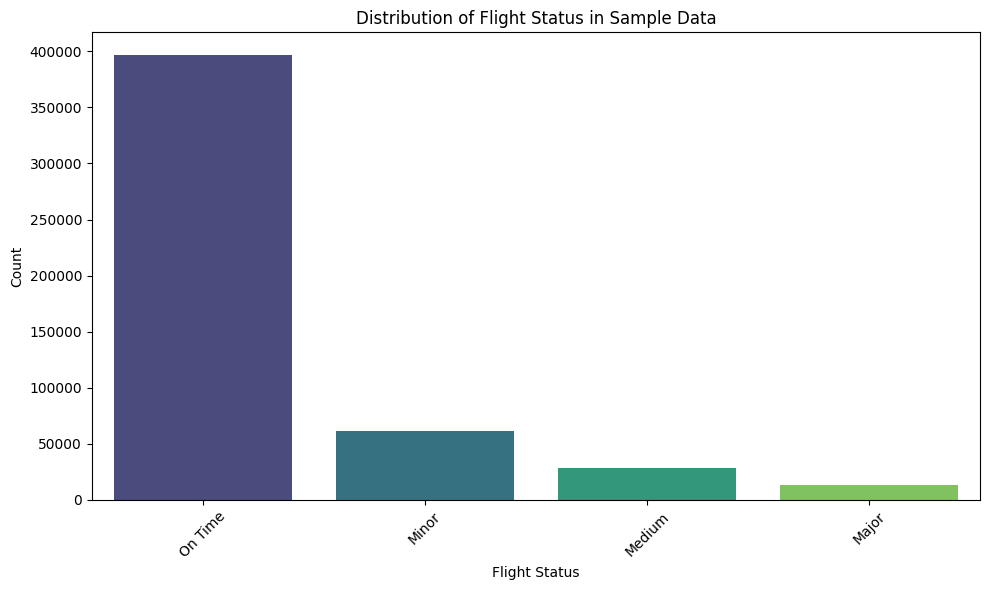

In [ ]:
# Visualize the distribution of Flight_Status in the sample
plt.figure(figsize=(10, 6))
sns.countplot(data=dat_explore.join(y_train), x='Flight_Status', palette='viridis')
plt.title('Distribution of Flight Status in Sample Data')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

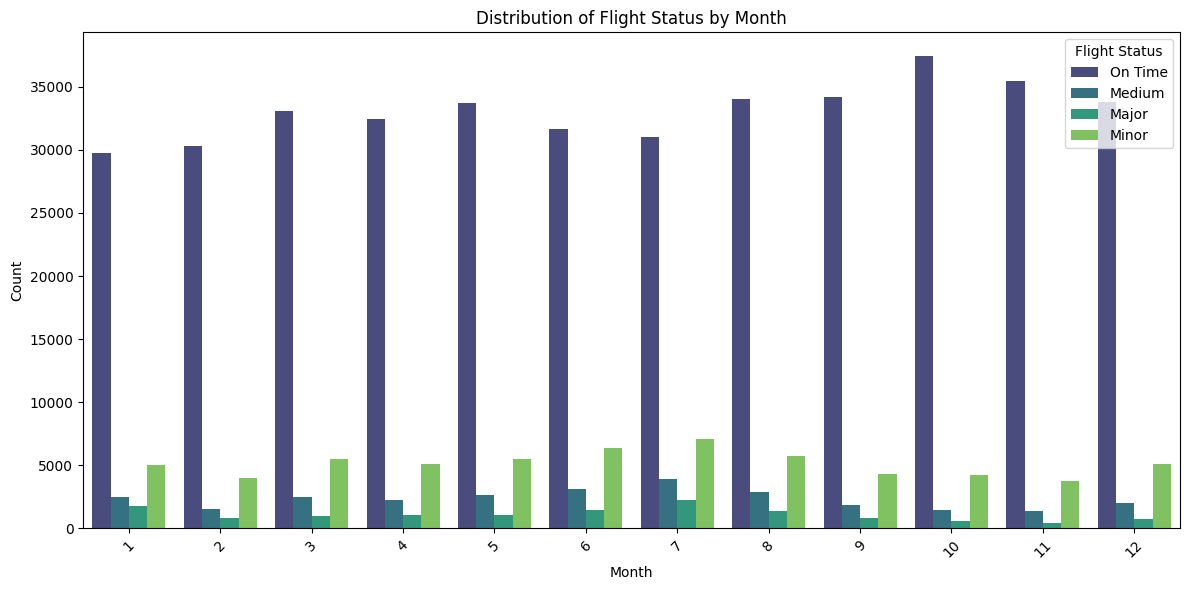

In [36]:
# Visualize the distribution of Flight_Status by Month
plt.figure(figsize=(12, 6))
sns.countplot(data=dat_explore.join(y_train), x='Month', hue='Flight_Status', palette='viridis')
plt.title('Distribution of Flight Status by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.tight_layout()
plt.show()

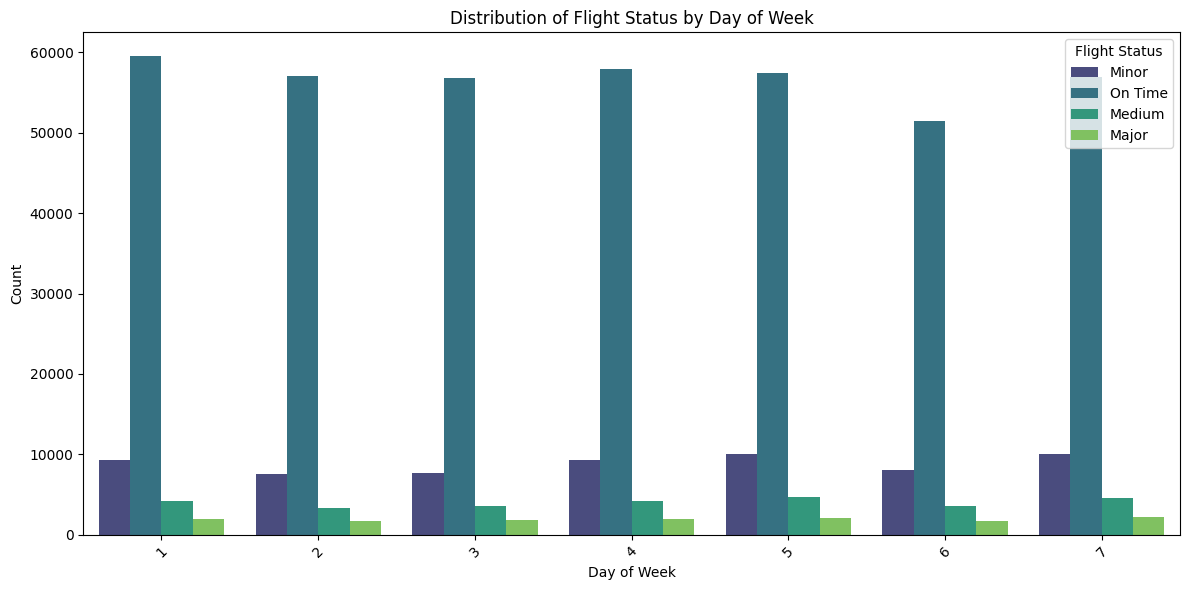

In [37]:
# Visualize the distribution of Flight_Status by Day of Week
plt.figure(figsize=(12, 6))
sns.countplot(data=dat_explore.join(y_train), x='DayOfWeek', hue='Flight_Status', palette='viridis')
plt.title('Distribution of Flight Status by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.tight_layout()
plt.show()

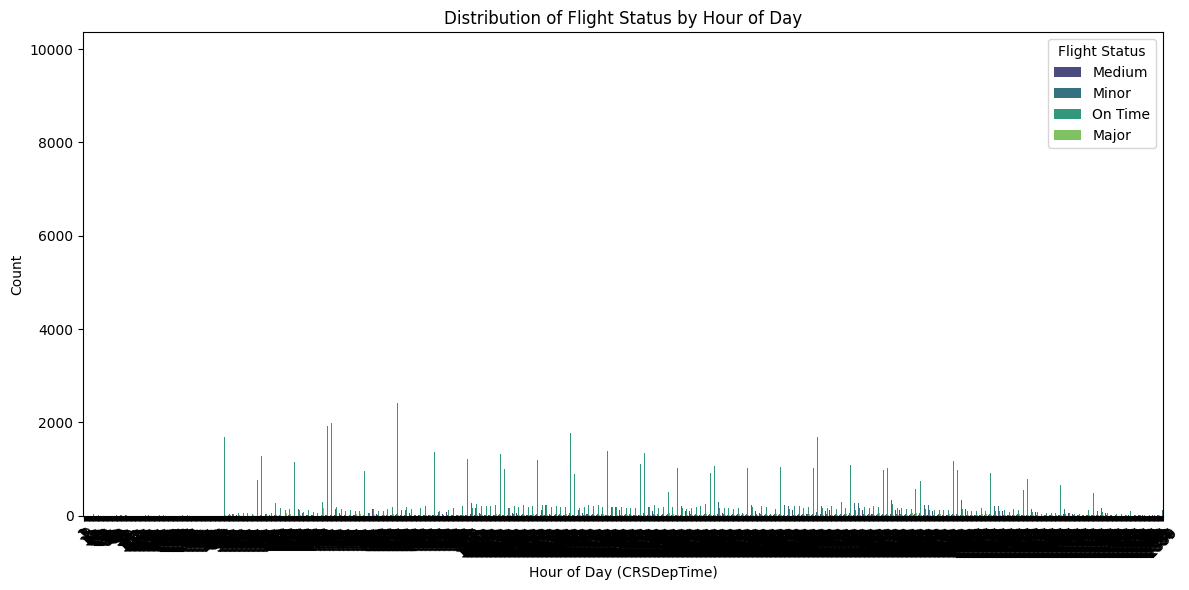

In [38]:
# Visualize the distribution of Flight_Status by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(data=dat_explore.join(y_train), x='CRSDepTime', hue='Flight_Status', palette='viridis')
plt.title('Distribution of Flight Status by Hour of Day')
plt.xlabel('Hour of Day (CRSDepTime)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.tight_layout()
plt.show()

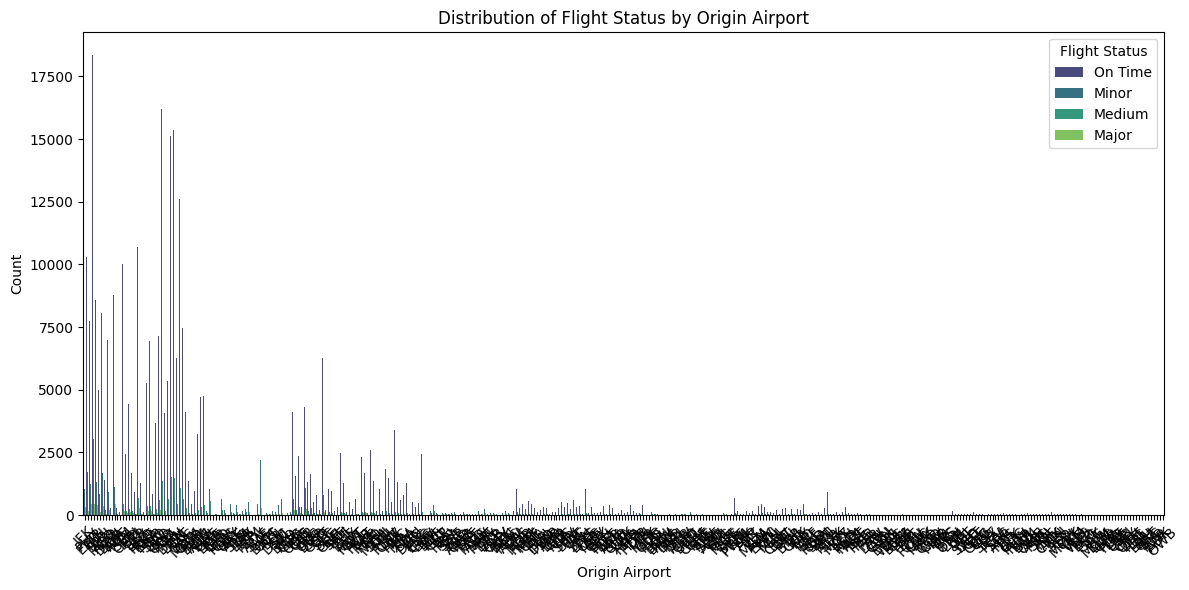

In [39]:
# Visualize the distribution of Flight_Status by Origin Airport
plt.figure(figsize=(12, 6))
sns.countplot(data=dat_explore.join(y_train), x='Origin', hue='Flight_Status', palette='viridis')
plt.title('Distribution of Flight Status by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.tight_layout()
plt.show()

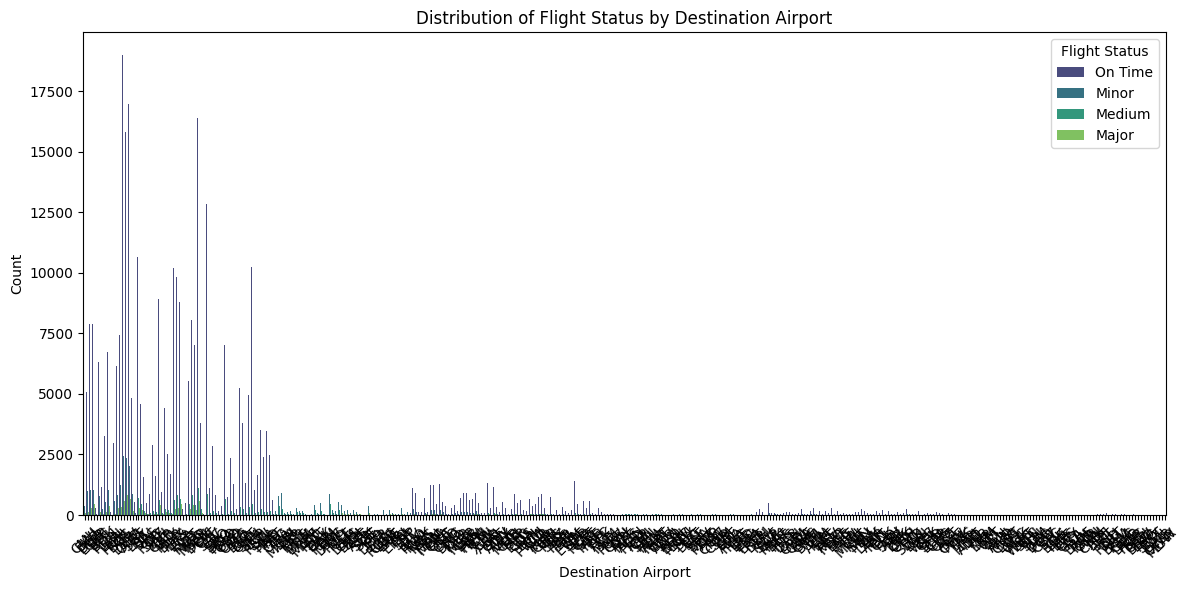

In [40]:
# Visualize the distribution of Flight_Status by Destination Airport
plt.figure(figsize=(12, 6))
sns.countplot(data=dat_explore.join(y_train), x='Dest', hue='Flight_Status', palette='viridis')
plt.title('Distribution of Flight Status by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.tight_layout()
plt.show()

In [26]:
# Visualize the distribution of Flight_Status by Distance
plt.figure(figsize=(12, 6))
sns.histplot(data=dat_explore.join(y_train), x='Distance', hue='Flight_Status', bins=30, palette='viridis', kde=True)
plt.title('Distribution of Flight Status by Distance')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.tight_layout()
plt.show()

: 